In [4]:
import tensorflow as tf

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

pd.pandas.set_option('display.max_columns',None)

In [7]:
df = pd.read_csv("demandPrediction.csv")
df.sample(15)

,bsId,episode,step,loadSMS,rawActSMS,loadInt,rawActInt,loadCalls,rawActCalls,defSMS,rawActDefSMS,defInt,rawActDefInt,defCalls,rawActDefCalls,schedSMS,schedInt,schedCalls,schedDelaySMS,schedDelayInt,schedDelayCalls,dropSMS,dropInt,dropCalls,totalSched,bsCap,totalDropped,rejectRate,rejectRateCalls,rejectRateInt,rejectRateSMS,delayRate,delayRateCalls,delayRateInt,delayRateSMS,reward,episodeReward,avgEpisodeReward
60918,1,21,60918,2.316875,8.513227,12.347963,17.069082,1.946304,8.262262,0.0,7.543080,0.0,6.594235,0.000000,5.357614,2.316875,12.347963,1.946304,0.0,0.0,0.0,0.0,0.0,0.000000,16.611142,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,57.996437,137783.17580,229.542770
90317,1,32,90317,0.155899,7.561393,6.116744,14.867892,0.041837,7.766731,0.0,7.608636,0.0,4.933192,0.000000,7.341125,0.155899,6.116744,0.041837,0.0,0.0,0.0,0.0,0.0,0.000000,6.314480,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,56.281319,70189.55676,1804.464233
98222,1,35,98222,1.207699,8.880104,13.278561,17.425596,0.968758,8.897538,0.0,6.362988,0.0,5.095558,0.000000,8.024139,1.207699,13.278561,0.968758,0.0,0.0,0.0,0.0,0.0,0.000000,15.455018,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,57.477890,44485.09996,3408.414551
26101,1,9,26101,2.163077,8.365126,11.560294,16.591152,1.554570,5.564388,0.0,7.713935,0.0,7.043014,0.000000,5.165130,2.163077,11.560294,1.554570,0.0,0.0,0.0,0.0,0.0,0.000000,15.277940,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,57.834816,58180.31910,-1284.978027
53812,1,19,53812,2.257928,9.381982,15.566249,17.676908,1.313716,7.858119,0.0,7.418296,0.0,6.042046,0.000000,5.938211,2.257928,15.566249,1.313716,0.0,0.0,0.0,0.0,0.0,0.000000,19.137892,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,55.568802,51575.42892,183.708618
101028,1,36,101028,0.690142,9.511343,15.295697,18.367697,0.394201,8.838535,0.0,6.714864,0.0,4.651015,0.000000,8.687381,0.690142,15.295697,0.394201,0.0,0.0,0.0,0.0,0.0,0.000000,16.380040,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,54.915009,46084.11564,3512.747559
37310,1,13,37310,0.545874,7.386898,7.683333,17.712479,0.173510,8.060284,0.0,4.017469,0.0,5.285781,0.000000,0.655525,0.545874,7.683333,0.173510,0.0,0.0,0.0,0.0,0.0,0.000000,8.402717,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,54.921051,61163.15431,-653.099731
82214,1,29,82214,1.594100,7.603828,7.274656,16.081062,1.445781,8.363522,0.0,7.326228,0.0,5.905402,0.000000,6.103121,1.594100,7.274656,1.445781,0.0,0.0,0.0,0.0,0.0,0.000000,10.314536,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,57.197254,83634.86331,1190.349609
43490,1,15,43490,0.804113,6.931436,8.425961,16.035604,0.333677,6.776271,0.0,6.357132,0.0,9.712970,0.000000,-1.878106,0.804113,8.425961,0.333677,0.0,0.0,0.0,0.0,0.0,0.000000,9.563751,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,56.230553,94801.00808,-231.728745
107431,1,38,107431,0.895359,9.828737,16.813350,19.341251,0.733704,8.731729,0.0,6.587214,0.0,3.230843,0.000000,9.060902,0.895359,16.813350,0.733704,0.0,0.0,0.0,0.0,0.0,0.000000,18.442414,33.912006,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,53.226734,94519.10085,1946.421997


In [8]:
df.shape

(116257, 38)

In [9]:
# Needed only for Reinforcement Learning
df =df.drop(columns = ["bsCap","reward","episodeReward","avgEpisodeReward"])

In [10]:
df.head()

,bsId,episode,step,loadSMS,rawActSMS,loadInt,rawActInt,loadCalls,rawActCalls,defSMS,rawActDefSMS,defInt,rawActDefInt,defCalls,rawActDefCalls,schedSMS,schedInt,schedCalls,schedDelaySMS,schedDelayInt,schedDelayCalls,dropSMS,dropInt,dropCalls,totalSched,totalDropped,rejectRate,rejectRateCalls,rejectRateInt,rejectRateSMS,delayRate,delayRateCalls,delayRateInt,delayRateSMS
0,1,0,0,1.023141,40.118584,9.431191,4.930484,0.185912,4.546803,0.0,-26.255821,0.000000,-37.304459,0.000000,-1.072198,1.023141,4.930484,0.185912,0.0,0.000000,0.000000,0.0,0.00000,0.0,6.139538,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0
1,1,0,1,1.045016,24.498693,9.450071,-1.458077,0.224175,-8.278831,0.0,11.339501,4.500707,-35.527287,0.000000,-26.394537,1.045016,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,1.045016,0.00000,0.000000,0.0,0.00000,0.0,0.422989,0.0,0.477215,0.0
2,1,0,2,1.066891,40.858761,9.468951,18.049885,0.262438,-34.017075,0.0,6.102356,13.950779,3.083514,0.224175,28.821590,1.066891,9.468951,0.000000,0.0,3.083514,0.224175,0.0,0.00000,0.0,10.535842,0.00000,0.000000,0.0,0.00000,0.0,0.902510,1.0,1.000000,0.0
3,1,0,3,1.088765,29.308859,9.487831,-30.458654,0.300701,12.641309,0.0,33.689182,7.783751,-29.501209,0.262438,11.177251,1.088765,0.000000,0.300701,0.0,0.000000,0.262438,0.0,17.27158,0.0,1.389466,17.27158,0.000000,0.0,0.00000,0.0,0.024304,1.0,0.000000,0.0
4,1,0,4,0.332562,20.821238,9.082516,34.438545,0.426964,-44.818333,0.0,-38.692871,0.000000,-7.616797,0.000000,-14.072517,0.332562,9.082516,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,9.415079,0.00000,0.153395,0.0,0.16136,0.0,0.872260,0.0,1.000000,0.0


In [11]:
#Focusing only on Internet and not SMS, Calls
columns_to_drop = [
    "loadSMS", "rawActSMS", "defSMS", "rawActDefSMS", "schedSMS", "schedDelaySMS", "dropSMS", "rejectRateSMS", "delayRateSMS",
    "loadCalls", "rawActCalls", "defCalls", "rawActDefCalls", "schedCalls", "schedDelayCalls", "dropCalls", "rejectRateCalls", "delayRateCalls"
]

# Drop unnecessary columns
df = df.drop(columns=columns_to_drop, errors="ignore")

In [12]:
df.head()

,bsId,episode,step,loadInt,rawActInt,defInt,rawActDefInt,schedInt,schedDelayInt,dropInt,totalSched,totalDropped,rejectRate,rejectRateInt,delayRate,delayRateInt
0,1,0,0,9.431191,4.930484,0.000000,-37.304459,4.930484,0.000000,0.00000,6.139538,0.00000,0.000000,0.00000,0.000000,0.000000
1,1,0,1,9.450071,-1.458077,4.500707,-35.527287,0.000000,0.000000,0.00000,1.045016,0.00000,0.000000,0.00000,0.422989,0.477215
2,1,0,2,9.468951,18.049885,13.950779,3.083514,9.468951,3.083514,0.00000,10.535842,0.00000,0.000000,0.00000,0.902510,1.000000
3,1,0,3,9.487831,-30.458654,7.783751,-29.501209,0.000000,0.000000,17.27158,1.389466,17.27158,0.000000,0.00000,0.024304,0.000000
4,1,0,4,9.082516,34.438545,0.000000,-7.616797,9.082516,0.000000,0.00000,9.415079,0.00000,0.153395,0.16136,0.872260,1.000000


In [13]:
feature_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
print(feature_with_na)

for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4),' % missing values ')

[]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116257 entries, 0 to 116256
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   bsId           116257 non-null  int64  
 1   episode        116257 non-null  int64  
 2   step           116257 non-null  int64  
 3   loadInt        116257 non-null  float64
 4   rawActInt      116257 non-null  float64
 5   defInt         116257 non-null  float64
 6   rawActDefInt   116257 non-null  float64
 7   schedInt       116257 non-null  float64
 8   schedDelayInt  116257 non-null  float64
 9   dropInt        116257 non-null  float64
 10  totalSched     116257 non-null  float64
 11  totalDropped   116257 non-null  float64
 12  rejectRate     116257 non-null  float64
 13  rejectRateInt  116257 non-null  float64
 14  delayRate      116257 non-null  float64
 15  delayRateInt   116257 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 14.2 MB


In [15]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25]
df['bsId'].unique()

array([1], dtype=int64)

C:\Users\Ashok Adithya\.conda\envs\tf_2_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


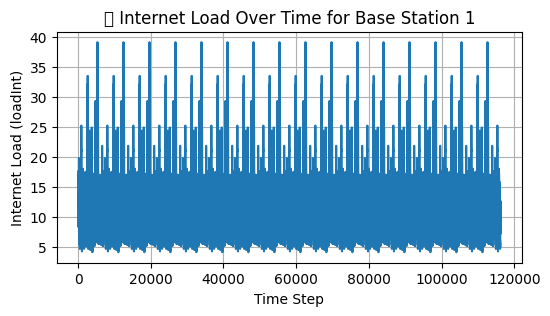

In [16]:
bs_id_to_view = 1  # Change this to any bsId you want
filtered_df = df[df["bsId"] == bs_id_to_view]

plt.figure(figsize=(6, 3))
sns.lineplot(x="step", y="loadInt", data=filtered_df)
plt.xlabel("Time Step")
plt.ylabel("Internet Load (loadInt)")
plt.title(f"📊 Internet Load Over Time for Base Station {bs_id_to_view}")
plt.grid()
plt.show()


C:\Users\Ashok Adithya\.conda\envs\tf_2_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


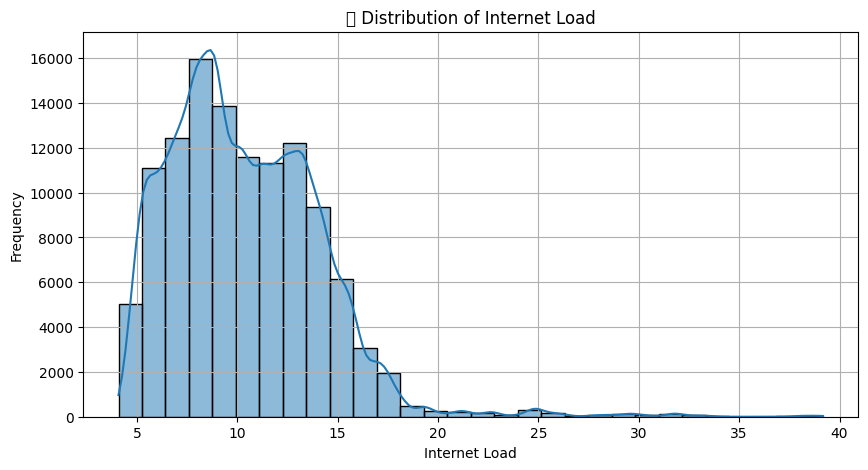

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df["loadInt"], bins=30, kde=True)
plt.xlabel("Internet Load")
plt.ylabel("Frequency")
plt.title("📊 Distribution of Internet Load")
plt.grid()
plt.show()

C:\Users\Ashok Adithya\.conda\envs\tf_2_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


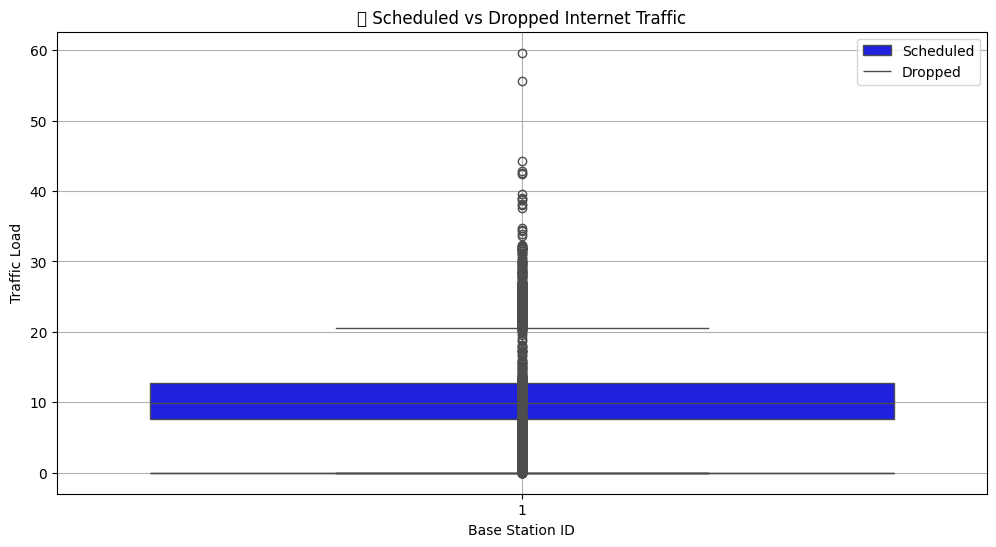

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="bsId", y="schedInt", data=df, color="blue")
sns.boxplot(x="bsId", y="dropInt", data=df, color="red")
plt.xlabel("Base Station ID")
plt.ylabel("Traffic Load")
plt.title("📊 Scheduled vs Dropped Internet Traffic")
plt.legend(["Scheduled", "Dropped"])
plt.grid()
plt.show()


C:\Users\Ashok Adithya\.conda\envs\tf_2_9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


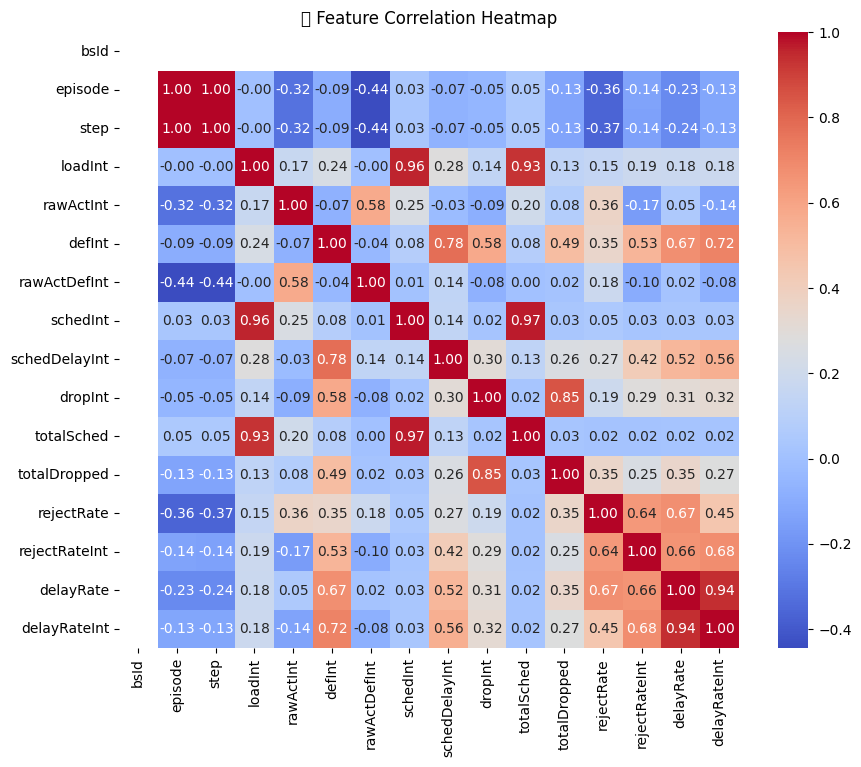

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Feature Correlation Heatmap")
plt.show()


In [20]:
#From the Correlation Table , thing we can infer
# No need for episode
# Removing delayed rate int for continuous learning
df = df.drop(columns=["episode","delayRateInt"])

In [21]:
df_scaled = df.copy()
df_scaled.shape

(116257, 14)

In [22]:
df.shape

(116257, 14)

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load dataset (if not already loaded)
# df = pd.read_csv("your_dataset.csv")

# Select relevant features for training
features = ["loadInt", "rawActInt", "defInt", "schedInt", "schedDelayInt", "dropInt",
            "totalSched", "totalDropped", "rejectRate", "rejectRateInt", "delayRate"]

# Scale data
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Convert dataframe to numpy array
data = df[features].values  

# Define sequence length (e.g., past 10 steps)
sequence_length = 60

# Prepare sequences for LSTM
X, Y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])  # Last 10 time steps
    Y.append(data[i+sequence_length, 0])  # Predict next 'loadInt'

X, Y = np.array(X), np.array(Y)


print("Shape of X:", X.shape)  # (samples, sequence_length, features)
print("Shape of Y:", Y.shape)  


Shape of X: (116197, 60, 11)
Shape of Y: (116197,)


In [24]:
df.head()

,bsId,step,loadInt,rawActInt,defInt,rawActDefInt,schedInt,schedDelayInt,dropInt,totalSched,totalDropped,rejectRate,rejectRateInt,delayRate
0,1,0,0.152401,0.554672,0.000000,-37.304459,0.153148,0.000000,0.000000,0.151177,0.000000,0.000000,0.000000,0.000000
1,1,1,0.152939,0.483699,0.094446,-35.527287,0.000000,0.000000,0.000000,0.025732,0.000000,0.000000,0.000000,0.422989
2,1,2,0.153477,0.700421,0.292754,3.083514,0.294119,0.116113,0.000000,0.259430,0.000000,0.000000,0.000000,0.902510
3,1,3,0.154015,0.161519,0.163340,-29.501209,0.000000,0.000000,0.289545,0.034214,0.286071,0.000000,0.000000,0.024304
4,1,4,0.142466,0.882490,0.000000,-7.616797,0.282115,0.000000,0.000000,0.231833,0.000000,0.775907,0.810289,0.872260


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (92957, 60, 11)
Testing Data Shape: (23240, 60, 11)


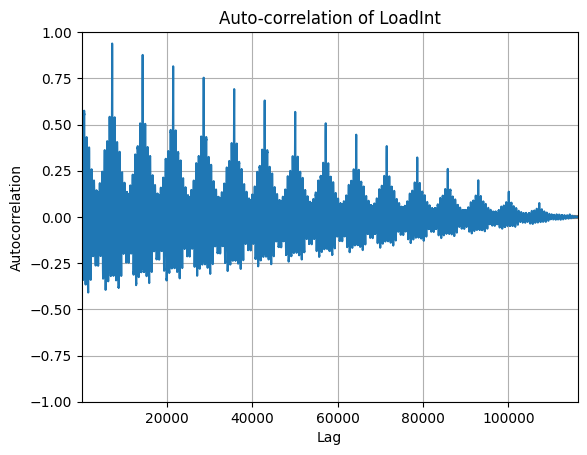

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot auto-correlation for loadInt
pd.plotting.autocorrelation_plot(df["loadInt"])
plt.title("Auto-correlation of LoadInt")
plt.show()


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
tan_model = Sequential([
    LSTM(128, activation="tanh", return_sequences=True, kernel_regularizer=l2(0.01), input_shape=(sequence_length, len(features))),
    Dropout(0.3),
    LSTM(64, activation="tanh"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1)  # Output: Predicted loadInt
])

# Compile Model
tan_model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Summary
tan_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           71680     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 123,201
Trainable params: 123,201
Non-trai

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = tan_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=32, callbacks=[early_stop])

Epoch 1/20
2905/2905 [==============================] - 84s 26ms/step - loss: 0.0053 - val_loss: 0.0017
Epoch 2/20
2905/2905 [==============================] - 72s 25ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 3/20
2905/2905 [==============================] - 78s 27ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/20
2905/2905 [==============================] - 65s 22ms/step - loss: 0.0014 - val_loss: 9.4303e-04
Epoch 5/20
2905/2905 [==============================] - 62s 21ms/step - loss: 0.0014 - val_loss: 9.2162e-04
Epoch 6/20
2905/2905 [==============================] - 61s 21ms/step - loss: 0.0013 - val_loss: 8.6283e-04
Epoch 7/20
2905/2905 [==============================] - 61s 21ms/step - loss: 0.0013 - val_loss: 8.3491e-04
Epoch 8/20
2905/2905 [==============================] - 66s 23ms/step - loss: 0.0013 - val_loss: 8.6093e-04
Epoch 9/20
2905/2905 [==============================] - 69s 24ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/20
2905/2905 [=====================

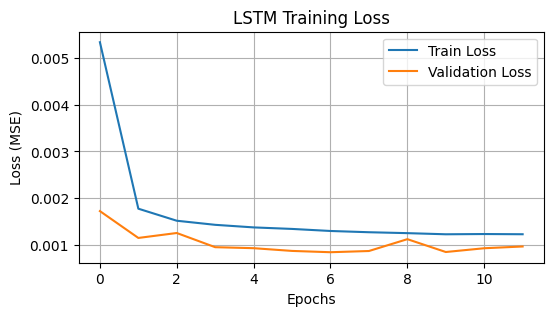

In [31]:
plt.figure(figsize=(6, 3))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("LSTM Training Loss")
plt.grid()
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on Test Data
Y_pred = tan_model.predict(X_test)

# Inverse Transform (to get back actual values)
Y_pred_original = scaler.inverse_transform(
    np.hstack((Y_pred.reshape(-1,1), np.zeros((len(Y_pred), len(features)-1)))))[:,0]

Y_test_original = scaler.inverse_transform(
    np.hstack((Y_test.reshape(-1,1), np.zeros((len(Y_test), len(features)-1)))))[:,0]

# Calculate Metrics
mae = mean_absolute_error(Y_test_original, Y_pred_original)
rmse = np.sqrt(mean_squared_error(Y_test_original, Y_pred_original))
r2 = r2_score(Y_test_original, Y_pred_original)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better fit


727/727 [==============================] - 8s 8ms/step
Model Performance:
Mean Absolute Error (MAE): 0.4611
Root Mean Squared Error (RMSE): 0.9121
R² Score: 0.9403


In [33]:
tan_model.save("demandPredictionTanh2.h5")

In [34]:
tah_model = tf.keras.models.load_model("demandPredictionTanh2.h5")

In [35]:
tah_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           71680     
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 123,201
Trainable params: 123,201
Non-trai